In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
xls=pd.ExcelFile("/content/AssignmentData.xlsx")

In [3]:
xls.sheet_names

['WorkerFunnel', 'ABTest']

In [4]:
df1=pd.read_excel(xls,sheet_name='WorkerFunnel')

In [5]:
df1.head(10)

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.80,7080,59.0,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8.0,0.886500
2,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570
3,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570
4,2015-01-01 00:00:00,Q1,Sewing,0.80,1920,56.0,NaN
5,2015-01-01 00:00:00,Q1,Sewing,0.80,6720,56.0,0.800125
6,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8.0,0.755167
7,2015-01-01 00:00:00,Q1,Sewing,0.75,6900,57.5,0.753683
8,2015-01-01 00:00:00,Q1,Sewing,0.75,6000,55.0,0.753098
9,2015-01-01 00:00:00,Q1,Sewing,0.75,6900,57.5,0.750428


In [6]:
df1.describe()

,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
count,1197.000000,1197.000000,1197.000000,1167.000000
mean,0.729632,4567.460317,34.609858,0.734882
std,0.097891,3348.823563,22.197687,0.174629
min,0.070000,0.000000,2.000000,0.233705
25%,0.700000,1440.000000,9.000000,0.650272
50%,0.750000,3960.000000,34.000000,0.773333
75%,0.800000,6960.000000,57.000000,0.850176
max,0.800000,25920.000000,89.000000,1.120437


In [7]:
df1.isnull().sum()

Date                      0
Quarter                   0
Department                0
Targeted Productivity     0
Overtime                  0
No. of Workers            0
Actual Productivity      30
dtype: int64

In [8]:
df1.fillna(0,inplace=True)

In [9]:
df1.isnull().sum()

Date                     0
Quarter                  0
Department               0
Targeted Productivity    0
Overtime                 0
No. of Workers           0
Actual Productivity      0
dtype: int64

In [10]:
df1['Target Achieved'] = np.where(df1['Actual Productivity'] > df1['Targeted Productivity'], 'Yes', 'No')

In [11]:
df1['Target Achieved']

0       Yes
1       Yes
2       Yes
3       Yes
4        No
       ... 
1192     No
1193     No
1194     No
1195     No
1196     No
Name: Target Achieved, Length: 1197, dtype: object

In [12]:
df1.groupby('Department')['Actual Productivity'].mean()

Department
Finishing    0.736673
Sewing       0.701665
Name: Actual Productivity, dtype: float64

In [13]:
df1.groupby('Quarter')['Overtime'].sum()

Quarter
Q1    1613130
Q2    1458930
Q3    1028160
Q4    1203110
Q5     163920
Name: Overtime, dtype: int64

In [14]:
df1.groupby(['Department', 'Quarter'])['No. of Workers'].mean()

Department  Quarter
Finishing   Q1         10.503356
            Q2          9.721088
            Q3         10.098765
            Q4         11.055556
            Q5          8.666667
Sewing      Q1         52.030806
            Q2         52.513298
            Q3         52.980620
            Q4         52.453571
            Q5         52.652174
Name: No. of Workers, dtype: float64

In [15]:
start_Date=df1.groupby('Department')['Date'].head(1)
start_Date

0    2015-01-01 00:00:00
1    2015-01-01 00:00:00
Name: Date, dtype: object

In [16]:
End_Date=df1.groupby('Department')['Date'].tail(1)
End_Date

1191    2015-11-03 00:00:00
1196    2015-11-03 00:00:00
Name: Date, dtype: object

In [17]:
df1['Target Achieved'].value_counts()
df1['Actual Productivity'].describe()

count    1197.000000
mean        0.716464
std         0.207213
min         0.000000
25%         0.636049
50%         0.755486
75%         0.850137
max         1.120437
Name: Actual Productivity, dtype: float64

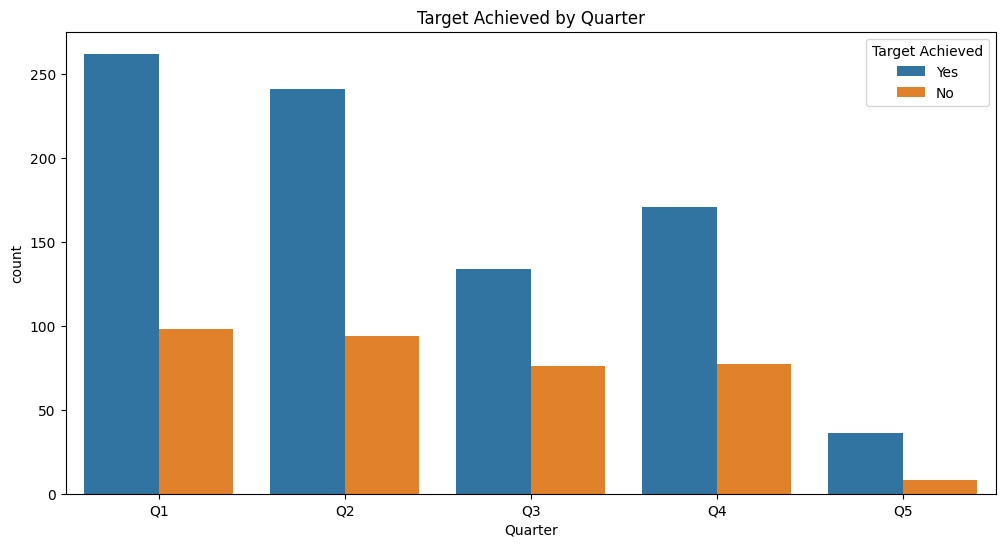

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='Quarter', hue='Target Achieved', data=df1)
plt.title('Target Achieved by Quarter')
plt.show()

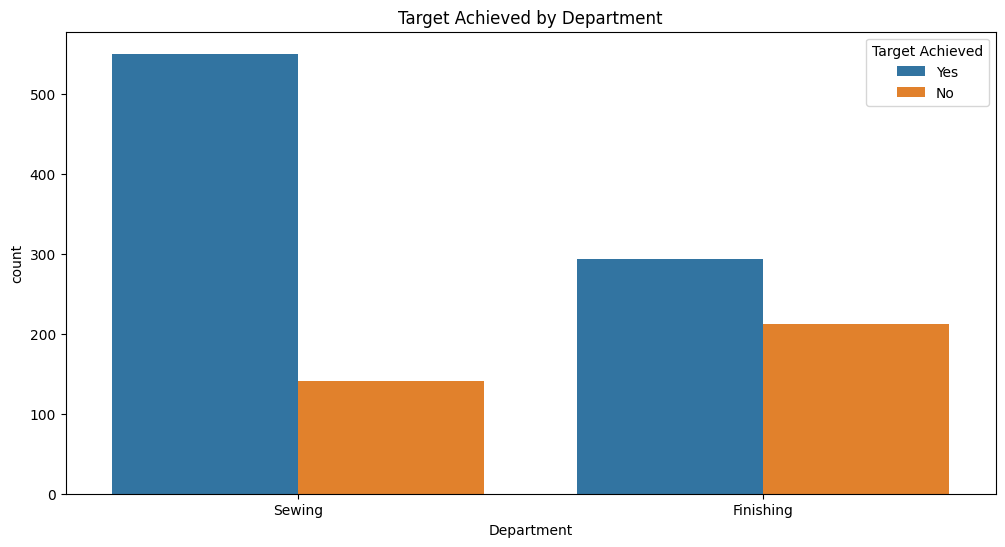

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Department', hue='Target Achieved', data=df1)
plt.title('Target Achieved by Department')
plt.show()

In [21]:
from statsmodels.tsa.arima.model import ARIMA
series = pd.Series(df1['Actual Productivity'])
series.index = pd.to_datetime(df1['Date']).dt.to_period('M')
model_arima = ARIMA(series, order=(5, 1, 0))
model_fit = model_arima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [32]:
import math
from sklearn.metrics import mean_squared_error
residuals = model_fit.resid
rmse = np.sqrt(mean_squared_error(series, model_fit.fittedvalues))
print('Root Mean Squared Error (RMSE): %.3f' % rmse)


Root Mean Squared Error (RMSE): 0.206


In [36]:
from sklearn.metrics import mean_absolute_percentage_error
residuals = model_fit.resid
mape =mean_absolute_percentage_error(series, model_fit.fittedvalues)
print('Mean Absolute Percentage Error (MAPE): %.3f' % mape)

Mean Absolute Percentage Error (MAPE): 84429032897929.781


In [37]:
df1.head()

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity,Target Achieved
0,2015-01-01 00:00:00,Q1,Sewing,0.80,7080,59.0,0.940725,Yes
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8.0,0.886500,Yes
2,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570,Yes
3,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570,Yes
4,2015-01-01 00:00:00,Q1,Sewing,0.80,1920,56.0,0.000000,No


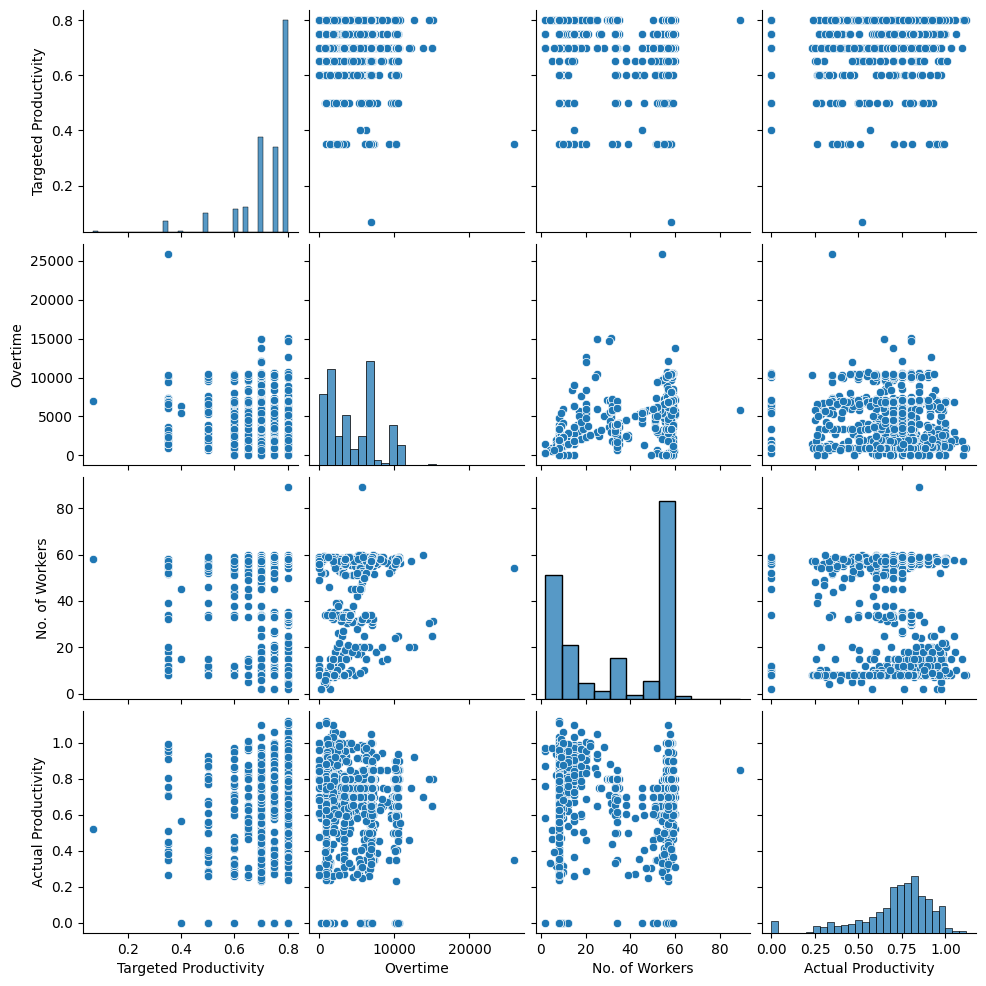

In [38]:
sns.pairplot(df1)

In [39]:
x=df1[['Targeted Productivity','No. of Workers','Overtime']].values
y=df1[['Actual Productivity']].values

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [42]:
from sklearn.linear_model import  LinearRegression

In [43]:
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [44]:
y_predict=linear_model.predict(x_test)

In [45]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_predict)

0.036041033083903

In [46]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_predict)

82487793516058.94

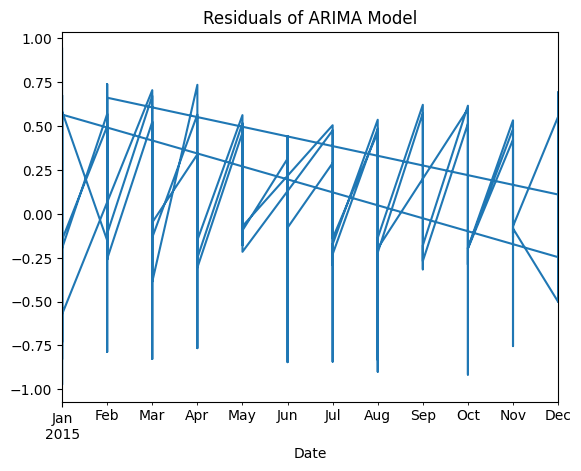

In [57]:
residuals.plot()
plt.title('Residuals of ARIMA Model')
plt.show()

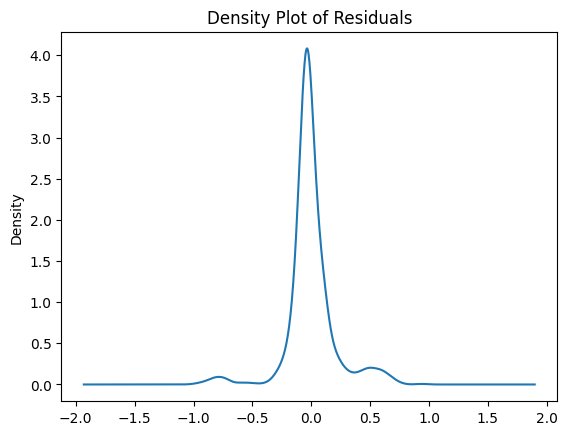

In [58]:
residuals.plot(kind='kde')
plt.title('Density Plot of Residuals')
plt.show()